# Mask detection

Images and Annotations: https://www.kaggle.com/andrewmvd/face-mask-detection

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!git clone https://github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 16.03 MiB/s, done.
Resolving deltas: 100% (560/560), done.


In [2]:
import os
os.chdir('/content/drive/MyDrive/DeepLearningInVision/Mask_RCNN')
!pip3 install -r requirements.txt
!python3 setup.py install 

     |████████████████████████████████| 163kB 7.6MB/s 
     |████████████████████████████████| 204kB 7.4MB/s 
running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/utils.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/visualize.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/__init__.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/parallel_model.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/config.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/model.py 

In [3]:
pip show mask-rcnn

Name: mask-rcnn
Version: 2.1
Summary: Mask R-CNN for object detection and instance segmentation
Home-page: https://github.com/matterport/Mask_RCNN
Author: Matterport
Author-email: waleed.abdulla@gmail.com
License: MIT
Location: /usr/local/lib/python3.6/dist-packages/mask_rcnn-2.1-py3.6.egg
Requires: 
Required-by: 


In [4]:
class Image:
    def __init__(self, absoluteFileName, width, height, depth, maskObjects):
        self.__maskObjects = maskObjects
        self.__absoluteFileName = absoluteFileName
        #self.__size = [width, height, depth]
        self.__size = [width, height]
    
    def allBoxesWithLabel(self):
        return [[maskObject.boxcoords(), maskObject.label()] for maskObject in self.maskObjects()]
    
    def maskObjects(self):
        return self.__maskObjects
    def absoluteFilename(self):
        return self.__absoluteFileName
    def size(self):
        return self.__size
    def numberOfMasks(self):
        return len(self.__maskObjects)

class MaskObject:
    def __init__(self, label, xmin, ymin, xmax, ymax):
        self.__label = label
        self.__xmin = xmin
        self.__ymin = ymin
        self.__xmax = xmax
        self.__ymax = ymax
    def boxcoords(self):
        return [self.__xmin, self.__ymin, self.__xmax, self.__ymax]
    def label(self):
        return self.__label

In [5]:
import xml.etree.ElementTree as ElementTree
import os.path

class MetadataExtractor:
    file_prefix = "maksssksksss" 
    
    def __init__(self, basepath):
        self.__basepath = basepath
        self.__annotationBase = os.path.join(basepath, 'annotations')
        self.__imageBase = os.path.join(basepath, 'images')
    
    def getImagesBasePath(self):
        return self.__imageBase
    
    def getAbsoluteImagePathById(self, image_id):
        imageFileName = "{0}{1}.png".format(self.file_prefix, image_id)
        return os.path.join(self.__imageBase, imageFileName)
    
    def getAbsoluteAnnotationPathById(self, image_id):
        annotationFileName = "{0}{1}.xml".format(self.file_prefix, image_id)
        return os.path.join(self.__annotationBase, annotationFileName)
        
    def getImageMetadata(self, image_id):
        tree = ElementTree.parse(self.getAbsoluteAnnotationPathById(image_id))
        root = tree.getroot()
        maskObjects = []
        for obj in root.findall('.//object'):
            label = obj.find('name').text
            box = obj.find('bndbox')
            xmin = int(box.find('xmin').text)
            ymin = int(box.find('ymin').text)
            xmax = int(box.find('xmax').text)
            ymax = int(box.find('ymax').text)
            maskObject = MaskObject(label, xmin, ymin, xmax, ymax)
            maskObjects.append(maskObject)
        filename = root.find('filename').text
        size = root.find('size')
        width = int(size.find('width').text)
        height = int(size.find('height').text)
        depth = int(size.find('depth').text)
        filename = root.find('filename').text
        absoluteFilename = os.path.join(self.__imageBase, filename)
        image = Image(absoluteFilename, width, height, depth, maskObjects)
        return image   

The following is only for testing. It tests if the XML Metadata extractor is working

In [6]:
basepath = '/content/drive/MyDrive/DeepLearningInVision/Data'
extractor = MetadataExtractor(basepath)
imageMetadata = extractor.getImageMetadata('7')

print(imageMetadata.absoluteFilename())
print("size:")
print(imageMetadata.size())

boxesWithLabel = imageMetadata.allBoxesWithLabel()

print(boxesWithLabel[0][1])
for i in range(len(boxesWithLabel)):
    box = boxesWithLabel[i]
    label = boxesWithLabel[i]
    print("box: {0}".format(box))
    print("label: {0}".format(label))

/content/drive/MyDrive/DeepLearningInVision/Data/images/maksssksksss7.png
size:
[400, 300]
with_mask
box: [[253, 116, 342, 210], 'with_mask']
label: [[253, 116, 342, 210], 'with_mask']
box: [[152, 96, 222, 174], 'with_mask']
label: [[152, 96, 222, 174], 'with_mask']
box: [[120, 134, 173, 194], 'with_mask']
label: [[120, 134, 173, 194], 'with_mask']
box: [[118, 66, 135, 90], 'without_mask']
label: [[118, 66, 135, 90], 'without_mask']


Create DataSet which inherits from Mask R-CNN Dataset

In [9]:
%tensorflow_version 1.x
from mrcnn import utils
import os
import sys
import math
import random
import cv2
from numpy import zeros
from numpy import asarray

class OxygenMaskDataset(utils.Dataset):
    classNameMask = "with_mask"
    classNameNoMask = "without_mask"
    classNameWearedIncorrect = "mask_weared_incorrect"
    basepath = '/content/drive/MyDrive/DeepLearningInVision/Data'
    extractor = MetadataExtractor(basepath)

    def load_dataset(self, is_train=True):
        self.add_class("dataset", 1, self.classNameMask)
        self.add_class("dataset", 2, self.classNameNoMask)
        self.add_class("dataset", 3, self.classNameWearedIncorrect)

        numberOfImagesTrain = 350
        images_dir = self.extractor.getImagesBasePath()
        print(images_dir)
        maxItems = len(os.listdir(images_dir))
        #maxItems = 10
        
        for image_id in range(maxItems):
            if is_train and (image_id >= numberOfImagesTrain):
                continue
            if not is_train and (image_id < numberOfImagesTrain):
                continue
            
            ann_path = self.extractor.getAbsoluteAnnotationPathById(image_id)
            img_path = self.extractor.getAbsoluteImagePathById(image_id)            
            
            self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)
            
            
    def load_mask(self, image_id):
        info = self.image_info[image_id]
        imageMetadata = self.extractor.getImageMetadata(image_id)
        
        boxesWithLabel = imageMetadata.allBoxesWithLabel()
        size = imageMetadata.size()
        w = size[0]
        h = size[1]        
        # create one array for all masks, each on a different channel
        masks = zeros([h, w, len(boxesWithLabel)], dtype='uint8')
        # create masks
        class_ids = list()
        
        for i in range(len(boxesWithLabel)):
            box = boxesWithLabel[i][0]
            label = boxesWithLabel[i][1]
            if label == 'with_mask':
                row_s, row_e = box[1], box[3]
                col_s, col_e = box[0], box[2]
                masks[row_s:row_e, col_s:col_e, i] = 1
                class_ids.append(self.class_names.index(self.classNameMask))
            if label == 'without_mask':
                row_s, row_e = box[1], box[3]
                col_s, col_e = box[0], box[2]
                masks[row_s:row_e, col_s:col_e, i] = 2
                class_ids.append(self.class_names.index(self.classNameNoMask))
            if label == 'mask_weared_incorrect':
                row_s, row_e = box[1], box[3]
                col_s, col_e = box[0], box[2]
                masks[row_s:row_e, col_s:col_e, i] = 3
                class_ids.append(self.class_names.index(self.classNameWearedIncorrect))
        return masks, asarray(class_ids, dtype='int32')
    
    # load an image reference
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']

In [ ]:
pip show keras

Name: Keras
Version: 2.3.1
Summary: Deep Learning for humans
Home-page: https://github.com/keras-team/keras
Author: Francois Chollet
Author-email: francois.chollet@gmail.com
License: MIT
Location: /tensorflow-1.15.2/python3.6
Requires: scipy, h5py, six, numpy, keras-applications, keras-preprocessing, pyyaml
Required-by: textgenrnn, keras-vis, kapre, fancyimpute


/content/drive/MyDrive/DeepLearningInVision/Data/images
(300, 400, 3)
(300, 400, 4)


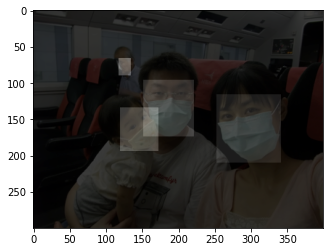

In [10]:
from matplotlib import pyplot

# train set
train_set = OxygenMaskDataset()
train_set.load_dataset(is_train=True)
train_set.prepare()
# load an image
image_id = 7
image = train_set.load_image(image_id)
print(image.shape)
# load image mask
pyplot.imshow(image)

mask, class_ids = train_set.load_mask(image_id)
print(mask.shape)  
for j in range(mask.shape[2]):
    pyplot.imshow(mask[:, :, j], cmap='gray', alpha=0.3)
pyplot.show()

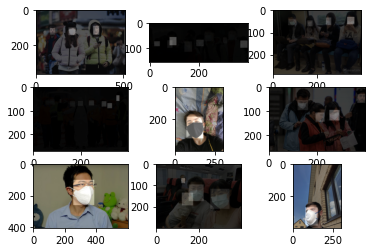

In [11]:
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    image = train_set.load_image(i)
    pyplot.imshow(image)
    # plot all masks
    mask, _ = train_set.load_mask(i)
    for j in range(mask.shape[2]):
        pyplot.imshow(mask[:, :, j], cmap='gray', alpha=0.3)
# show the figure
pyplot.show()

Now we train the model:

In [12]:
%tensorflow_version 1.x
from mrcnn.config import Config
from mrcnn.model import MaskRCNN

class OxygenMaskConfig(Config):
    NAME = "oxygenmask_cfg"
    NUM_CLASSES = 1 + 3 #background + with_mask, without_mask and mask_weared_incorrect
    STEPS_PER_EPOCH = 131

Using TensorFlow backend.


In [9]:
# train set
train_set = OxygenMaskDataset()
train_set.load_dataset(is_train=True)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))

# test/val set
test_set = OxygenMaskDataset()
test_set.load_dataset(is_train=False)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))

NameError: ignored

In [14]:
# prepare config
config = OxygenMaskConfig()
config.display()
# define the model
model = MaskRCNN(mode='training', model_dir='./', config=config)
model.keras_model.metrics_tensors = []
# load weights (mscoco)
model.load_weights('/content/drive/MyDrive/DeepLearningInVision/mask_rcnn_coco.h5', by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])
# train weights (output layers or 'heads')
print(config.LEARNING_RATE)
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=5, layers='heads')


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                16
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


/tensorflow-1.15.2/python3.6/keras/engine/training_generator.py:49: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the `keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/1


Process ForkPoolWorker-1:
Process ForkPoolWorker-4:
Process ForkPoolWorker-3:
Process ForkPoolWorker-2:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/tensorflow-1.15.2/python3.6/keras/utils/data_utils.py", line 650, in next_sample
    return six.next(_SHARED_SEQUENCES[uid])
  File "/tensorflow-1.15.2/python3.6/k

KeyboardInterrupt: ignored

In [1]:
%tensorflow_version 1.x
from mrcnn.config import Config
from mrcnn.model import MaskRCNN

class PredictionConfig(Config):
  NAME = "oxygenmask_cfg"
  NUM_CLASSES = 1 + 3 #background + with_mask, without_mask and mask_weared_incorrect
  STEPS_PER_EPOCH = 131
  GPU_COUNT = 1
  IMAGES_PER_GPU = 1

TensorFlow 1.x selected.


Using TensorFlow backend.


In [4]:
config = PredictionConfig()
model = MaskRCNN(mode='inference', model_dir='./', config=config)
model.keras_model.metrics_tensors = []
model.load_weights('/content/drive/MyDrive/DeepLearningInVision/mask_rcnn_oxygenmask_cfg_0005.h5', by_name=True)

In [7]:
import mrcnn.model as modellib
import numpy as np

# calculate the mAP for a model on a given dataset
def evaluate_model(dataset, model, config):
	APs = list()
	for image_id in dataset.image_ids:
		# load image and ground truth bounding boxes (masks for the image id)
		image, image_meta, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
		# convert pixel values (e.g. center)
		scaled_image = modellib.mold_image(image, config)
		# convert image into one sample
		sample = np.expand_dims(scaled_image, 0)
		# make prediction
		yhat = model.detect(sample, verbose=0)
		# extract results for first sample
		r = yhat[0]
		# calculate statistics, including AP
		AP, _, _, _ = utils.compute_ap(gt_bbox, gt_class_id, gt_mask, r["rois"], r["class_ids"], r["scores"], r['masks'])
		# store
		APs.append(AP)
	# calculate the mean AP across all images
	mAP = np.mean(APs)
	return mAP

In [8]:
# Calculation of mAP for the model on the train and test dataset
# evaluate model on training dataset
train_mAP = evaluate_model(train_set, model, config)
print("Train mAP: %.3f" % train_mAP)
# evaluate model on test dataset
test_mAP = evaluate_model(test_set, model, config)
print("Test mAP: %.3f" % test_mAP)

NameError: ignored

Re-starting from epoch 5
/content/drive/MyDrive/DeepLearningInVision/Data/images
extracted boxes: [[[79, 105, 109, 142], 'without_mask'], [[185, 100, 226, 144], 'with_mask'], [[325, 90, 360, 141], 'without_mask']], width: 512, height: 366


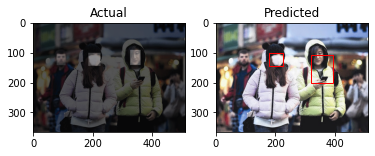

extracted boxes: [[[79, 105, 109, 142], 'without_mask'], [[185, 100, 226, 144], 'with_mask'], [[325, 90, 360, 141], 'without_mask']], width: 512, height: 366


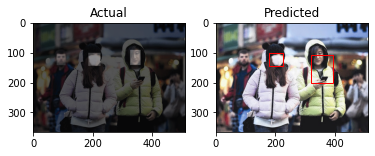

In [ ]:
import mrcnn.model as modellib
import numpy as np
from matplotlib import pyplot
from matplotlib.patches import Rectangle

def plot_actual_vs_predicted(dataset, model, cfg, n_images=5):
	# load image and mask
  for i in range(n_images):
	  # load the image and mask
    image = dataset.load_image(i) 
    mask, _ = dataset.load_mask(i)
	  # convert pixel values (e.g. center)
    scaled_image = modellib.mold_image(image, cfg)
	  # convert image into one sample
    sample = np.expand_dims(scaled_image, 0)
	  # make prediction
    yhat = model.detect(sample, verbose=0)[0]
	  # define subplot
    pyplot.subplot(n_images, 2, i*2+1)
	  # plot raw pixel data
    pyplot.imshow(image)
    pyplot.title('Actual')
	  # plot masks
    for j in range(mask.shape[2]):
      pyplot.imshow(mask[:, :, j], cmap='gray', alpha=0.3)
	  # get the context for drawing boxes
    pyplot.subplot(n_images, 2, i*2+2)
	  # plot raw pixel data
    pyplot.imshow(image)
    pyplot.title('Predicted')
    ax = pyplot.gca()
	  # plot each box
    for i in range(len(yhat['rois'])):
		  # get coordinates
      y1, x1, y2, x2 = yhat['rois'][i]
		  # calculate width and height of the box
      width, height = x2 - x1, y2 - y1
		  # create the shape
      rect = Rectangle((x1, y1), width, height, fill=False, color='red')
		  # draw the box
      ax.add_patch(rect)
  # show the figure
  pyplot.show()
 
# create config
cfg = PredictionConfig()
# define the model
model = MaskRCNN(mode='inference', model_dir='./', config=cfg)
# load model weights
model_path = '/content/drive/MyDrive/DeepLearningInVision/Mask_RCNN/oxygenmask_cfg20210105T1900/mask_rcnn_oxygenmask_cfg_0005.h5'
model.load_weights(model_path, by_name=True)
# plot predictions for train dataset
number_of_images = 1
dataset = OxygenMaskDataset()
dataset.load_dataset(is_train=True)
dataset.prepare()

plot_actual_vs_predicted(train_set, model, cfg, number_of_images)
# plot predictions for test dataset
plot_actual_vs_predicted(dataset, model, cfg, number_of_images)

/content/drive/MyDrive/DeepLearningInVision/Predictions
['/content/drive/MyDrive/DeepLearningInVision/Predictions/woman-wearing-mask.original.jpg', '/content/drive/MyDrive/DeepLearningInVision/Predictions/bezos-final-0404_kompri.png', '/content/drive/MyDrive/DeepLearningInVision/Predictions/shutterstock_1704465010.jpg', '/content/drive/MyDrive/DeepLearningInVision/Predictions/incorrect.jpg']
/content/drive/MyDrive/DeepLearningInVision/Predictions/woman-wearing-mask.original.jpg
extracted boxes: [[[79, 105, 109, 142], 'without_mask'], [[185, 100, 226, 144], 'with_mask'], [[325, 90, 360, 141], 'without_mask']], width: 512, height: 366
className: with_mask


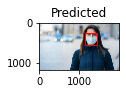

/content/drive/MyDrive/DeepLearningInVision/Predictions/bezos-final-0404_kompri.png
extracted boxes: [[[321, 34, 354, 69], 'with_mask'], [[224, 38, 261, 73], 'with_mask'], [[299, 58, 315, 81], 'with_mask'], [[143, 74, 174, 115], 'with_mask'], [[74, 69, 95, 99], 'with_mask'], [[191, 67, 221, 93], 'with_mask'], [[21, 73, 44, 93], 'with_mask'], [[369, 70, 398, 99], 'with_mask'], [[83, 56, 111, 89], 'without_mask']], width: 400, height: 156
className: without_mask


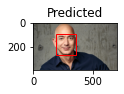

/content/drive/MyDrive/DeepLearningInVision/Predictions/shutterstock_1704465010.jpg
extracted boxes: [[[68, 42, 105, 69], 'with_mask'], [[154, 47, 178, 74], 'with_mask'], [[238, 34, 262, 69], 'with_mask'], [[333, 31, 366, 65], 'mask_weared_incorrect']], width: 400, height: 290
className: with_mask


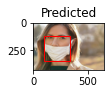

/content/drive/MyDrive/DeepLearningInVision/Predictions/incorrect.jpg
extracted boxes: [[[52, 53, 73, 76], 'with_mask'], [[72, 53, 92, 75], 'with_mask'], [[112, 51, 120, 68], 'with_mask'], [[155, 60, 177, 83], 'with_mask'], [[189, 59, 210, 80], 'with_mask'], [[235, 57, 257, 78], 'with_mask'], [[289, 60, 309, 83], 'with_mask'], [[313, 68, 333, 90], 'with_mask'], [[351, 35, 364, 59], 'with_mask']], width: 400, height: 271
className: with_mask


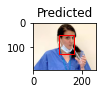

className: without_mask


In [ ]:
import mrcnn.model as modellib
import numpy as np
from matplotlib import pyplot
from matplotlib.patches import Rectangle
import skimage.io
import os

def imgToArray(absoluteFilePath):
    image = skimage.io.imread(absoluteFilePath)
    # If grayscale. Convert to RGB for consistency.
    if image.ndim != 3:
        image = skimage.color.gray2rgb(image)
        # If has an alpha channel, remove it for consistency
    if image.shape[-1] == 4:
        image = image[..., :3]
    return image

def plot_prediction(imageSourceDir, model, cfg):
    classNameById = { 1:"with_mask", 2:"without_mask", 3:"mask_weared_incorrect" }
    images = [os.path.join(imageSourceDir, fileName) for fileName in os.listdir(imageSourceDir)]
    print(imageSourceDir)
    print(images)
  
    for i in range(len(images)):
        imagePath = images[i]
        print(imagePath)
        image = imgToArray(imagePath)
        # convert pixel values (e.g. center)
        scaled_image = modellib.mold_image(image, cfg)
        # convert image into one sample
        sample = np.expand_dims(scaled_image, 0)
        # make prediction
        yhat = model.detect(sample, verbose=0)[0]
        # define subplot
        # get the context for drawing boxes
        pyplot.subplot(len(images), 2, i*2+2)
        # plot raw pixel data
        pyplot.imshow(image)
        pyplot.title('Predicted')
        ax = pyplot.gca()
        # plot each box
        for i in range(len(yhat['rois'])):
          # get coordinates
          y1, x1, y2, x2 = yhat['rois'][i]
          # calculate width and height of the box
          width, height = x2 - x1, y2 - y1
          # create the shape
          predClassId = int(yhat['class_ids'][i])
          className = classNameById[predClassId]
          print("className: {0}".format(className))
          rect = Rectangle((x1, y1), width, height, fill=False, color='red')
          # draw the box
          ax.add_patch(rect)
          # show the figure
          pyplot.show()
 
def LoadModel(self):
  cfg = PredictionConfig()
  model = MaskRCNN(mode='inference', model_dir='./', config=cfg)
  model_path = '/content/drive/MyDrive/DeepLearningInVision/Mask_RCNN/oxygenmask_cfg20210105T1900/mask_rcnn_oxygenmask_cfg_0005.h5'
  model.load_weights(model_path, by_name=True)
  return model
  
#model = LoadModel()
imageSourceDir = '/content/drive/MyDrive/DeepLearningInVision/Predictions'

plot_prediction(imageSourceDir, model, cfg)